In [1]:
!pip install MFDFA
!pip install git+https://github.com/rsautter/Zeta-Space@qq-Approach

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Zeta-Space (to revision qq-Approach) to /tmp/pip-req-build-vwol9y0f
  Running command git clone -q https://github.com/rsautter/Zeta-Space /tmp/pip-req-build-vwol9y0f
  Running command git checkout -b qq-Approach --track origin/qq-Approach
  Switched to a new branch 'qq-Approach'
  Branch 'qq-Approach' set up to track remote branch 'qq-Approach' from 'origin'.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for zetaSpace: filename=zetaSpace-0.1-py3-none-any.whl size=8531 sha256=7bf7a172b74deeb8ce5f8175bc06cc8db1a1b7792c16d7444f0edd3c1f67dbe9
  Stored in directory: /tmp/pip-ephem-wheel-cache-f1lj61p9/wheels/64/85/ba/158b996db769351d8d3a33c992db2d30412f1defbe3097f1

In [2]:
import zeta

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm
import matplotlib.gridspec as gridspec

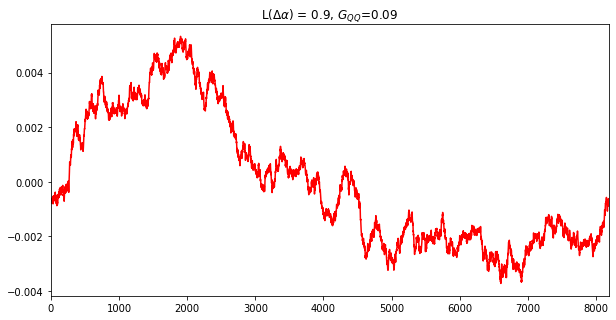

In [ ]:
rn = zeta.cNoise(2,[2**13])
_,_,lda = zeta.autoMFDFA(rn)
gqq = zeta.qqGaussianDistance(rn)

plt.figure(figsize=(10,5))
plt.plot(rn,color='r')
plt.title(r"L($\Delta \alpha$) = "+str(np.round(lda,2))+", $G_{QQ}$="+str(np.round(gqq,2)) )
plt.xlim(0,len(rn))
plt.show()

In [ ]:
maxSteps = 50
minimumLDA = 0.99

output = []
for i in tqdm.tqdm(range(maxSteps)):
  rn = zeta.cNoise(2,[2**13])
  _,_,lda = zeta.autoMFDFA(rn)
  if lda<minimumLDA:
    continue
  gqq = zeta.qqGaussianDistance(rn)
  newItem = {"lda":lda,"gqq":gqq,"serie":rn}
  output.append(newItem)

multi = pd.DataFrame(output)

100%|██████████| 50/50 [02:41<00:00,  3.23s/it]


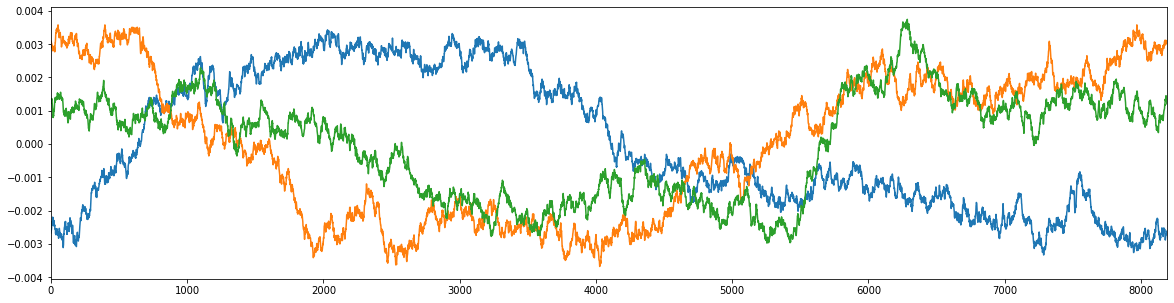

In [ ]:
plt.figure(figsize=(20,5))
for i in range(len(multi["serie"])):
  plt.plot(multi["serie"].iloc[i])
plt.xlim(0,len(multi["serie"].iloc[0]))
plt.title("Multifractal Red Noises")
plt.show()

In [ ]:
multi.to_pickle("multifractal_Reds.pkl")

In [ ]:
multi

,lda,gqq,serie
0,0.990342,0.099370,"[-0.002673351521887326, -0.0026310189563614464..."
1,0.999695,0.079042,"[0.0029643545092840787, 0.003006589797137983, ..."
2,0.995551,0.057638,"[0.0012311075284373281, 0.0012236749441116171,..."


In [ ]:
maxSteps = 50
maximumLDA = 0.3

output = []
for i in tqdm.tqdm(range(maxSteps)):
  rn = zeta.cNoise(2,[2**13])
  _,_,lda = zeta.autoMFDFA(rn)
  if lda>maximumLDA:
    continue
  gqq = zeta.qqGaussianDistance(rn)
  newItem = {"lda":lda,"gqq":gqq,"serie":rn}
  output.append(newItem)

mono = pd.DataFrame(output)

100%|██████████| 50/50 [02:40<00:00,  3.21s/it]


In [ ]:
mono

,lda,gqq,serie
0,0.288702,0.009331,"[-0.0006725614964489999, -0.000598376630239975..."
1,0.247040,0.059870,"[-0.0027341599358280144, -0.00283034215697155,..."


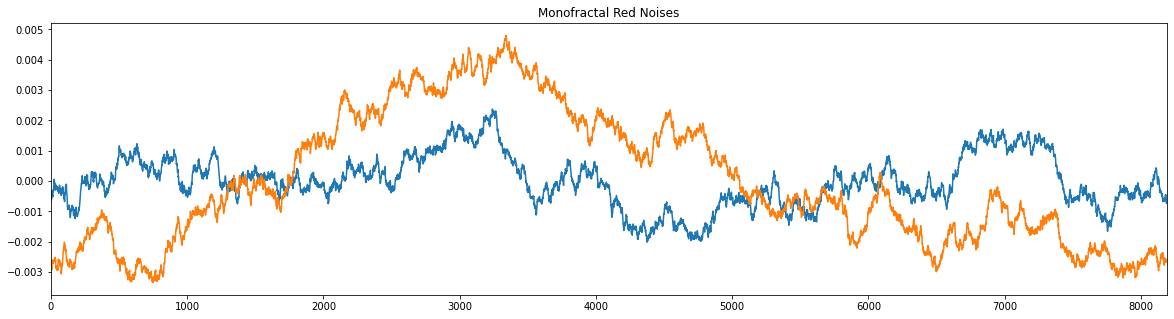

In [ ]:
plt.figure(figsize=(20,5))
for i in range(len(mono["serie"])):
  plt.plot(mono["serie"].iloc[i])
plt.xlim(0,len(multi["serie"].iloc[0]))
plt.title("Monofractal Red Noises")
plt.show()

In [ ]:
mono.to_pickle("monofractal_Reds.pkl")

#Loading Data


In [4]:
mono = pd.read_pickle("monofractal_Reds.pkl")
multi = pd.read_pickle("multifractal_Reds.pkl")

In [5]:
wn = zeta.cNoise(0,[2**13])

In [6]:
def getMedianSing(serie):
  a, fa, lda = zeta.autoMFDFA(serie,nqs=20)
  print(lda)
  metrics = [zeta.singularitySpectrumMetrics(a[i],fa[i]) for i in range(len(a))]
  metrics = pd.DataFrame(metrics)
  metrics = metrics.sort_values(by=['delta_alpha'])
  median = metrics.iloc[metrics.shape[0]//2]
  a, fa = median["alpha"],median["falpha"]
  return a ,fa

0.11755193861064203
0.2260976329304211
0.9903587167180046


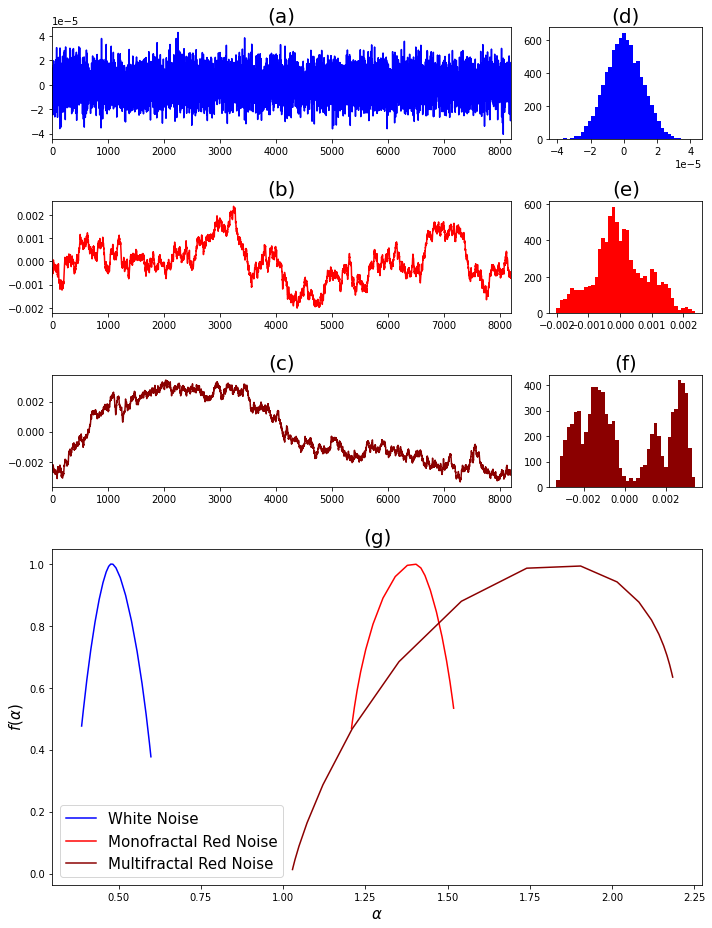

In [15]:
legendList = []
fig = plt.figure(tight_layout=True,figsize=(10,13))
gs = gridspec.GridSpec(4,2,width_ratios=[3,1],height_ratios=[1,1,1,3])

plt.subplot(gs[0,0])
plt.title("(a)",fontsize=20)
p1, = plt.plot(wn,color='blue',label="White Noise")
plt.xlim(0,len(wn))
legendList.append(p1) 

plt.subplot(gs[0,1])
plt.title("(d)",fontsize=20)
plt.hist(wn,color='blue',bins=40)


####################################################
plt.subplot(gs[1,0])
p1, = plt.plot(mono["serie"].iloc[0],color='red',label="Monofractal Red Noise")
plt.xlim(0,len(mono["serie"].iloc[0]))
plt.title("(b)",fontsize=20)
legendList.append(p1) 

plt.subplot(gs[1,1])
plt.title("(e)",fontsize=20)
plt.hist(mono["serie"].iloc[0],color='red',bins=40)


####################################################
plt.subplot(gs[2,0])
p1, = plt.plot(multi["serie"].iloc[0],color='darkred',label="Multifractal Red Noise")
plt.xlim(0,len(multi["serie"].iloc[0]))
legendList.append(p1) 
plt.title("(c)",fontsize=20)


plt.subplot(gs[2,1])
plt.hist(multi["serie"].iloc[0],color='darkred',bins=40)
plt.title("(f)",fontsize=20)


#####################################################
####################################################

plt.subplot(gs[3,:])
plt.title("(g)",fontsize=20)
a,fa = getMedianSing(wn)
plt.plot(a,fa,color='blue')

a,fa = getMedianSing(mono["serie"].iloc[0])
plt.plot(a,fa,color='red')

a,fa = getMedianSing(multi["serie"].iloc[0])
plt.plot(a,fa,color='darkred')
plt.xlabel(r"$\alpha$",fontsize = 15)
plt.ylabel(r"$f(\alpha)$",fontsize = 15)

plt.legend(handles=legendList,fontsize=15)
plt.savefig('redExtremes.png', dpi=300)

plt.show()